In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train1.csv')
test = pd.read_csv('test1.csv')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train['source'] = 'train'
test['source'] = 'test'

In [5]:
data = pd.concat([train, test], ignore_index = True)

In [6]:
train.shape

(8523, 13)

In [7]:
test.shape

(5681, 12)

In [8]:
data.shape

(14204, 13)

In [9]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [10]:
data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())
data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

In [11]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [12]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.234226,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027036,94.012000,1987.000000,834.247400
50%,12.792854,0.054021,142.247000,1999.000000,1794.331000
75%,16.000000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
data.nunique()

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3493
source                           2
dtype: int64

<Axes: xlabel='Item_Fat_Content'>

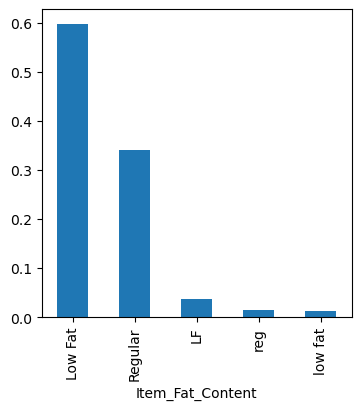

In [14]:
data['Item_Fat_Content'].value_counts(normalize = True).plot(kind = 'bar', figsize = (4,4))

<Axes: xlabel='Item_Type'>

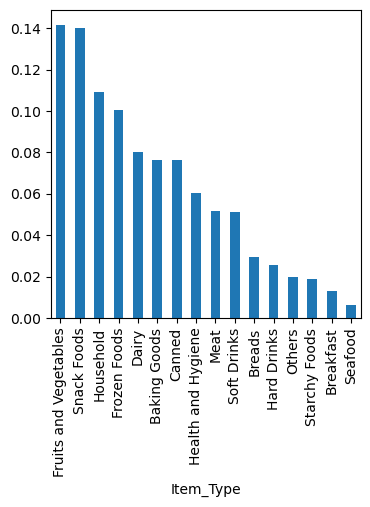

In [15]:
data['Item_Type'].value_counts(normalize = True).plot(kind = 'bar', figsize = (4,4))

In [16]:
data['Item_Visibility'].value_counts()

Item_Visibility
0.000000    879
0.076841      3
0.077011      3
0.077169      3
0.076792      3
           ... 
0.162572      1
0.014826      1
0.058034      1
0.043786      1
0.104720      1
Name: count, Length: 13006, dtype: int64

In [17]:
# The min value of item visibility is 0, which makes no sense if a product is displayed in a store, therefore we replace the 0 values with the mean
data['Item_Visibility'] = data['Item_Visibility'].replace(0, data['Item_Visibility'].mean())

In [18]:
data['Item_Visibility'].value_counts()

Item_Visibility
0.065953    879
0.076841      3
0.077011      3
0.077169      3
0.076792      3
           ... 
0.162572      1
0.014826      1
0.058034      1
0.043786      1
0.104720      1
Name: count, Length: 13006, dtype: int64

# Feature Engineering

#### Considering combining outlet_type

In [22]:
# If two outlet_types have the same mean sales, we can combine them together
data.pivot_table(values = 'Item_Outlet_Sales', index = 'Outlet_Type', aggfunc = 'mean')
# The default aggregation function in pivot_table function is mean

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


#### Modifying Item_Visibility

In our hypothesis, we expect products with higher visibility will have higher sales. But along with comparing products on absolute terms, we should also look at the visibility of that product in that particular store as compared to the mean visibility of that product across all stores. This will give us an idea about the importance that a particular product was given in a store as compared to other stores. Therefore, we get the average visibility of the products

In [32]:
avg_visibility = data.pivot_table(values = 'Item_Visibility', index = 'Item_Identifier')
avg_visibility

,Item_Visibility
Item_Identifier,
DRA12,0.049594
DRA24,0.045646
DRA59,0.139979
DRB01,0.087980
DRB13,0.014127
...,...
NCZ30,0.033897
NCZ41,0.064640
NCZ42,0.017610


In [27]:
data['Item_Visibility_Avg_Visibility_Ratio'] = data.apply(
    lambda x: x['Item_Visibility']/avg_visibility[x['Item_Identifier']], axis = 1

KeyError: 'FDA15'

In [35]:
avg_visibility.loc['FDA15']

Item_Visibility    0.017235
Name: FDA15, dtype: float64

In [37]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [38]:
avg_visibility.isnull().sum()

Item_Visibility    0
dtype: int64